## Observations and Insights 

In [60]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sts
import numpy as np 
from scipy.stats import sem
from scipy.stats import linregress
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="inner")
# Display the data table for preview
df.head(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [2]:
# Checking the number of mice.
total_mice = df['Mouse ID'].nunique()
print(f'The total number of Mice is {total_mice}!')


The total number of Mice is 249!


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = df[df.duplicated(['Mouse ID', 'Timepoint'])]
duplicate_mice


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
id_duplicate_mice = df[df.duplicated(['Mouse ID'])]
id_duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = df.drop_duplicates("Mouse ID")
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_total = clean_df["Mouse ID"].count()
clean_total

249

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.



In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
mean = df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
standard_dv = df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

summary_df = pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance, "Standard Deviation": standard_dv, "SEM": sem})
summary_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

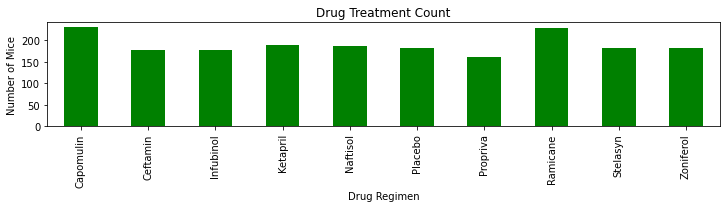

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
drug_data = pd.DataFrame(df.groupby(["Drug Regimen"]).count()).reset_index()
#Alter the dataframe down to two columns
drugs_df = drug_data[["Drug Regimen", "Mouse ID"]]
drugs_df = drugs_df.set_index("Drug Regimen") 

 #Creating the bar chart
drugs_df.plot(kind="bar",color='green', figsize=(10,3),legend=False)
plt.title("Drug Treatment Count")
plt.tight_layout()
plt.ylabel('Number of Mice')
plt.xlabel("Drug Regimen")
plt.show()



In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
# Create a list of both drug regimen and drug count
drug_regimen = summary_df.index.tolist()
drug_regimen

['Capomulin',
 'Ceftamin',
 'Infubinol',
 'Ketapril',
 'Naftisol',
 'Placebo',
 'Propriva',
 'Ramicane',
 'Stelasyn',
 'Zoniferol']

In [11]:
drug_count = (df.groupby(["Drug Regimen"])["Age_months"].count()).tolist()
drug_count


[230, 178, 178, 188, 186, 181, 161, 228, 181, 182]

Text(0, 0.5, 'Number of Mice')

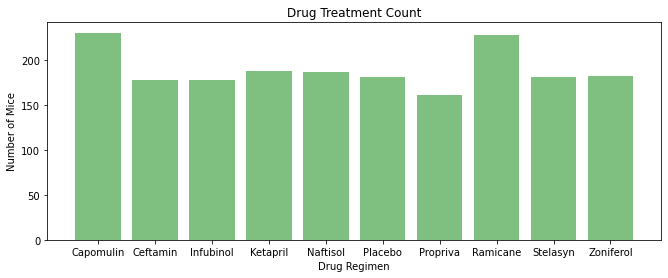

In [12]:
#Assign x-axis

x_axis = drug_regimen
#Creating and customizing bar chart
plt.figure(figsize=(11,4))
plt.bar(x_axis, drug_count, color='g', alpha=0.5, align="center")

plt.title("Drug Treatment Count")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice") 

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_df = pd.DataFrame(df.groupby(["Sex"]).count()).reset_index()
gender_df.head()



,Sex,Mouse ID,Drug Regimen,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,Female,935,935,935,935,935,935,935
1,Male,958,958,958,958,958,958,958


In [14]:
#Alter the dataframe down to two columns
gender_df = gender_df[["Sex","Mouse ID"]]
gender_df.head()

,Sex,Mouse ID
0,Female,935
1,Male,958


(-1.1095997883291242,
 1.1280182397336955,
 -1.1303272228198646,
 1.1103719980816438)

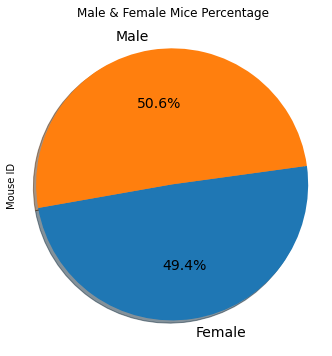

In [15]:
plt.figure(figsize=(12,6))
ax1 = plt.subplot(121, aspect="equal")
gender_df.plot(kind="pie", y = "Mouse ID", ax=ax1, autopct='%1.1f%%',
              startangle=190, shadow=True, labels=gender_df["Sex"], legend = False, fontsize=14)

plt.title("Male & Female Mice Percentage")
plt.axis('equal')

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_count = (df.groupby(["Sex"])["Age_months"].count()).tolist()
gender_count


[935, 958]

(-1.168554778187085,
 1.1046347624021708,
 -1.2267182048220846,
 1.1096662105117718)

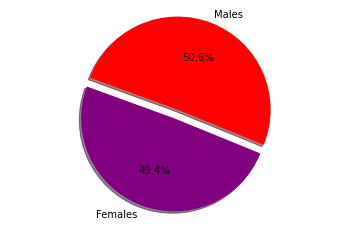

In [17]:
#Adding details to the pie chart
labels = ["Females", "Males"]
colors = ["purple", "red"]
explode = (0.1, 0)
#creating the pie chart
plt.pie(gender_count, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=160)
plt.axis("equal")

## Quartiles, Outliers and Boxplots

In [18]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Grab and sort columns: "Drug Regimen", "Mouse ID" and "Timepoint"
sorted_df = df.sort_values(["Drug Regimen", "Mouse ID", "Timepoint"], ascending=True)

# Start by getting the last (greatest) timepoint for each mouse

last_df = sorted_df.loc[sorted_df["Timepoint"] == 45]
last_df.head().reset_index()


,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,309,b128,Capomulin,Female,9,22,45,38.982878,2
1,299,b742,Capomulin,Male,7,21,45,38.939633,0
2,244,g288,Capomulin,Male,3,19,45,37.074024,1
3,360,g316,Capomulin,Female,22,22,45,40.159220,2
4,440,i557,Capomulin,Female,1,24,45,47.685963,1


In [19]:
 #Grab data from "Capomulin" and reset index
capo_df = last_df[last_df["Drug Regimen"].isin(["Capomulin"])]
capo_df.head().reset_index()

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,309,b128,Capomulin,Female,9,22,45,38.982878,2
1,299,b742,Capomulin,Male,7,21,45,38.939633,0
2,244,g288,Capomulin,Male,3,19,45,37.074024,1
3,360,g316,Capomulin,Female,22,22,45,40.159220,2
4,440,i557,Capomulin,Female,1,24,45,47.685963,1


In [20]:
 #Make column "Tumor Volume (mm3)" a dataframe object
capo_obj = capo_df.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
capo_obj = capo_obj["Tumor Volume (mm3)"]
capo_obj

0     23.343598
1     28.430964
2     28.484033
3     31.023923
4     31.896238
5     32.377357
6     33.329098
7     34.455298
8     36.041047
9     37.074024
10    37.311846
11    38.125164
12    38.846876
13    38.939633
14    38.982878
15    40.159220
16    40.658124
17    40.728578
18    41.483008
19    41.581521
20    47.685963
Name: Tumor Volume (mm3), dtype: float64

In [21]:
# If the data is in a dataframe, we use pandas to give quartile calculations
quartiles = capo_obj.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The median of temperatures is: {quartiles[0.5]}")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of temperatures is: 32.37735684
The upper quartile of temperatures is: 40.1592203
The interquartile range of temperatures is: 7.781863460000004
The median of temperatures is: 37.31184577
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [22]:
#Grab data from "Ramicane" and reset index
ram_df = last_df[last_df["Drug Regimen"].isin(["Ramicane"])]
ram_df.head().reset_index()

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,327,a411,Ramicane,Male,3,22,45,38.407618,1
1,430,a444,Ramicane,Female,10,25,45,43.047543,0
2,214,a520,Ramicane,Male,13,21,45,38.810366,1
3,174,a644,Ramicane,Female,7,17,45,32.978522,1
4,154,c758,Ramicane,Male,9,17,45,33.397653,1


In [23]:
#Grab data from "Ceftamin" and reset index
ceft_df = last_df[last_df["Drug Regimen"].isin(["Ceftamin"])]
ceft_df.head().reset_index()

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,493,a275,Ceftamin,Female,20,28,45,62.999356,3
1,993,j296,Ceftamin,Female,24,30,45,61.849023,3
2,1033,k210,Ceftamin,Male,15,28,45,68.923185,3
3,1112,l471,Ceftamin,Female,7,28,45,67.748662,1
4,1132,l661,Ceftamin,Male,18,26,45,59.851956,3


In [24]:
#Make column "Tumor Volume (mm3)" a dataframe object
ram_obj = ram_df.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
ram_obj = ram_obj["Tumor Volume (mm3)"]
ram_obj

0     22.050126
1     29.128472
2     30.276232
3     30.564625
4     30.638696
5     31.095335
6     31.560470
7     32.978522
8     33.397653
9     33.562402
10    36.134852
11    36.374510
12    37.225650
13    37.311236
14    38.407618
15    38.810366
16    40.659006
17    40.667713
18    43.047543
19    45.220869
Name: Tumor Volume (mm3), dtype: float64

In [25]:
# If the data is in a dataframe, we use pandas to give quartile calculations
quartiles = ram_obj.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The median of temperatures is: {quartiles[0.5]}")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of temperatures is: 30.981175224999998
The upper quartile of temperatures is: 38.508305307499995
The interquartile range of temperatures is: 7.527130082499998
The median of temperatures is: 34.848627300000004
Values below 19.690480101250003 could be outliers.
Values above 49.79900043124999 could be outliers.


In [26]:
#Make column "Tumor Volume (mm3)" a dataframe object
ceft_obj = ceft_df.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
ceft_obj = ceft_obj["Tumor Volume (mm3)"]
ceft_obj

0     59.741901
1     59.851956
2     61.386660
3     61.433892
4     61.849023
5     62.999356
6     64.299830
7     64.634949
8     64.729837
9     67.527482
10    67.748662
11    68.594745
12    68.923185
Name: Tumor Volume (mm3), dtype: float64

In [27]:
# If the data is in a dataframe, we use pandas to give quartile calculations
quartiles = ceft_obj.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The median of temperatures is: {quartiles[0.5]}")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.") 

The lower quartile of temperatures is: 61.43389223
The upper quartile of temperatures is: 67.52748237
The interquartile range of temperatures is: 6.093590140000003
The median of temperatures is: 64.29983003
Values below 52.29350701999999 could be outliers.
Values above 76.66786758 could be outliers.


In [28]:
# Grab data from "Infubinol" and reset index
infu_df = last_df[last_df["Drug Regimen"].isin(["Infubinol"])]
infu_df.head().reset_index()

# Make column "Tumor Volume (mm3)" a dataframe object
infu_obj = infu_df.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
infu_obj = infu_obj["Tumor Volume (mm3)"]
infu_obj 

0    60.918767
1    62.435404
2    62.754451
3    65.525743
4    66.083066
5    66.196912
6    67.685569
7    67.973419
8    72.226731
Name: Tumor Volume (mm3), dtype: float64

In [29]:
# If the data is in a dataframe, we use pandas to give quartile calculations
quartiles = infu_obj.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The median of temperatures is: {quartiles[0.5]}")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of temperatures is: 62.75445141
The upper quartile of temperatures is: 67.68556862
The interquartile range of temperatures is: 4.9311172099999965
The median of temperatures is: 66.08306589
Values below 55.35777559500001 could be outliers.
Values above 75.08224443499999 could be outliers.


In [30]:
# Create a list for different Tumour regimens
tumour = []
tumour.append(drug_regimen[0])
tumour.append(drug_regimen[1])
tumour.append(drug_regimen[2])
tumour.append(drug_regimen[7])
tumour

['Capomulin', 'Ceftamin', 'Infubinol', 'Ramicane']

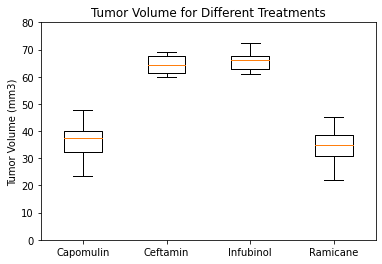

In [31]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

plt.boxplot([capo_obj,ceft_obj,infu_obj,ram_obj])
plt.title("Tumor Volume for Different Treatments")
plt.xticks([1,2,3,4],tumour)
plt.ylabel("Tumor Volume (mm3)")
plt.ylim(0,80)
plt.show()

## Line and Scatter Plots

In [40]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin_df = df.loc[df["Drug Regimen"] == "Capomulin"]
capomulin_df.head()
capomulin_df = capomulin_df.reset_index()
capomulin_df

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,10,s185,Capomulin,Female,3,17,0,45.000000,0
1,11,s185,Capomulin,Female,3,17,5,43.878496,0
2,12,s185,Capomulin,Female,3,17,10,37.614948,0
3,13,s185,Capomulin,Female,3,17,15,38.177232,0
4,14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...,...
225,440,i557,Capomulin,Female,1,24,45,47.685963,1
226,1452,r157,Capomulin,Male,22,25,0,45.000000,0
227,1453,r157,Capomulin,Male,22,25,5,45.597064,0
228,1454,r157,Capomulin,Male,22,25,10,46.059608,0


In [42]:
# Grab the mouse on the first index
capo_mouse = capomulin_df.loc[capomulin_df["Mouse ID"] == "s185"]
capo_mouse
mouse_timepoint = capo_mouse["Timepoint"]
mouse_tumorvol = capo_mouse["Tumor Volume (mm3)"]

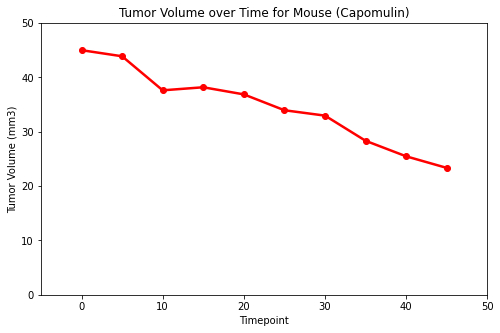

In [48]:

# Generate line plot depicting time point versus tumor volume for a micee treated with Capomulin
plt.figure(figsize=(8,5))
plt.plot(mouse_timepoint, mouse_tumorvol, marker="o",linewidth=2.5,color='r')
plt.title("Tumor Volume over Time for Mouse (Capomulin)")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.xlim(-5,50)
plt.ylim(0,50)
plt.show()

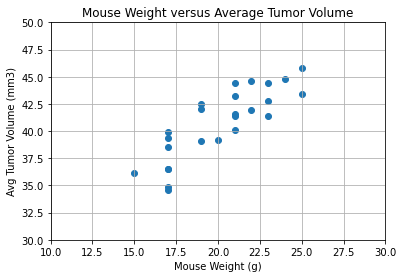

In [57]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

# Extract data to define mouse weight versus average tumor volume for the Capomulin regimen
mice_cap = capomulin_df.groupby("Mouse ID").mean()
mice_weight = mice_cap["Weight (g)"]
mice_avg_tumor = mice_cap["Tumor Volume (mm3)"]

# Generate scatter plot depicting mouse weight versus average tumor volume
plt.scatter(mice_weight, mice_avg_tumor)
plt.title("Mouse Weight versus Average Tumor Volume")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Avg Tumor Volume (mm3)")
plt.xlim(10,30)
plt.ylim(30,50)
plt.grid()
plt.show()


## Correlation and Regression

(30.0, 50.0)

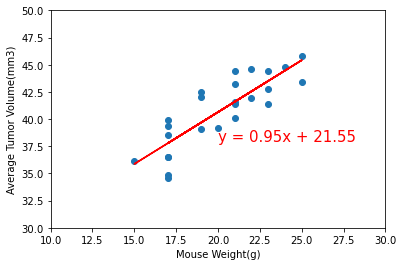

In [66]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
x_values = mice_weight
y_values = mice_avg_tumor
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
average_tumor = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Generate scatter plot depicting mouse weight versus average tumor volume including linear regression model
plt.scatter(x_values, y_values)
plt.plot(x_values,average_tumor,"r-")
plt.annotate(line_eq,(20,38),fontsize=15,color="red")
plt.xlabel("Mouse Weight(g)")
plt.ylabel("Average Tumor Volume(mm3)")
plt.xlim(10,30)
plt.ylim(30,50)


In [67]:
# Print correlation coefficient
print(f"Mouse weight versus average tumor volume correlation coefficient is {round(rvalue,2)}.")

Mouse weight versus average tumor volume correlation coefficient is 0.84.
